### Import library

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import csv

### Linear regression

In [7]:
class LinearRegression:
    def __init__(self):
        self.epoch = []
        self.train_loss = []
        self.weights = []
    def fit(self, X, y, lr = 0.01, epochs = 100):
        # X: design matrix
        n = X.shape[0]
        for epoch in range(epochs):
            w_old = self.weights
            gradient = (-2/n) * (X.T @ (y - (X @ w_old.T)))
            w_new = w_old - lr * gradient
            self.weights = w_new
            self.epoch.append(epoch)
            self.train_loss.append(self.get_loss(X, y))
    def get_loss(self, X, y):
        # X: design matrix
        MSE = (y - (X @ self.weights)).T @ (y - (X @ self.weights))
        return MSE/y.shape[0]
    def predict(self, X):
        # X: design matrix
        return X @ self.weights
    def evaluate(self, X, y):
        return self.get_loss(X, y)
    def plot_training_curve(self):
        plt.plot(self.epoch, self.train_loss)
        plt.xlabel("epoch")
        plt.ylabel("training loss")
        plt.show()
        return
    def plot_curve(self, train_bmi, train_charges, val_bmi, val_charges):
        # plot by x-axis is bmi and y-axis is charges
        x = np.linspace(10, 50, 1000)
        xd = np.concatenate((x.reshape((-1, 1)), np.asarray(np.ones((1000, 1)), dtype="float64")), axis = 1)
        y = self.predict(xd)
        plt.plot(x, y, color = 'r')
        plt.scatter(train_bmi, train_charges, c="#0000E3", alpha=0.8, s=2, label="Training data")
        plt.scatter(val_bmi, val_charges, c="#F75000", alpha=0.8, s=2, label="Validation data")
        plt.legend()
        plt.xlabel("BMI")
        plt.ylabel("Charges")
        plt.show()
        return

### Load data and pre-process data

In [8]:
# Load data
data_train = np.genfromtxt("dataset/regression_train.csv", delimiter=",", dtype = str)
features = data_train[0]
data_train = data_train[1:, :]
data_val = np.genfromtxt("dataset/regression_val.csv", delimiter=",", dtype = str)
data_val = data_val[1:, :]
data_test = np.genfromtxt("dataset/regression_test.csv", delimiter=",", dtype = str)
data_test = data_test[1:, :]

In [9]:
size_data_train = np.shape(data_train) # 938, 7
size_data_val = np.shape(data_val) # 200, 7
size_data_test = np.shape(data_test) # 200, 7

In [10]:
# pre-process training data
for i in range(size_data_train[0]):
    data_train[i][0] = np.float64(data_train[i][0]) # age
    data_train[i][2] = np.float64(data_train[i][2]) # bmi
    data_train[i][3] = np.float64(data_train[i][3]) # children
    data_train[i][6] = np.float64(data_train[i][6]) # charges
    # sex
    if data_train[i][1] == "female":
        data_train[i][1] = np.float64(0.0)
    else:
        data_train[i][1] = np.float64(1.0)
    # smoker
    if data_train[i][4] == "no":
        data_train[i][4] = np.float64(0.0)
    else:
        data_train[i][4] = np.float64(1.0)
    # region
    if data_train[i][5] == "southwest":
        data_train[i][5] = np.float64(3.0)
    elif data_train[i][5] == "southeast":
        data_train[i][5] = np.float64(2.0)
    elif data_train[i][5] == "northeast":
        data_train[i][5] = np.float64(0.0)
    elif data_train[i][5] == "northwest":
        data_train[i][5] = np.float64(1.0)
# pre-process validation data
for i in range(size_data_val[0]):
    data_val[i][0] = np.float64(data_val[i][0]) # age
    data_val[i][2] = np.float64(data_val[i][2]) # bmi
    data_val[i][3] = np.float64(data_val[i][3]) # children
    data_val[i][6] = np.float64(data_val[i][6]) # charges
    # sex
    if data_val[i][1] == "female":
        data_val[i][1] = np.float64(0.0)
    else:
        data_val[i][1] = np.float64(1.0)
    # smoker
    if data_val[i][4] == "no":
        data_val[i][4] = np.float64(0.0)
    else:
        data_val[i][4] = np.float64(1.0)
    # region
    if data_val[i][5] == "southwest":
        data_val[i][5] = np.float64(3.0)
    elif data_val[i][5] == "southeast":
        data_val[i][5] = np.float64(2.0)
    elif data_val[i][5] == "northeast":
        data_val[i][5] = np.float64(0.0)
    elif data_val[i][5] == "northwest":
        data_val[i][5] = np.float64(1.0)
# pre-process testing data
for i in range(size_data_test[0]):
    data_test[i][0] = np.float64(data_test[i][0]) # age
    data_test[i][2] = np.float64(data_test[i][2]) # bmi
    data_test[i][3] = np.float64(data_test[i][3]) # children
    data_test[i][6] = np.float64(0.0)
    # sex
    if data_test[i][1] == "female":
        data_test[i][1] = np.float64(0.0)
    else:
        data_test[i][1] = np.float64(1.0)
    # smoker
    if data_test[i][4] == "no":
        data_test[i][4] = np.float64(0.0)
    else:
        data_test[i][4] = np.float64(1.0)
    # region
    if data_test[i][5] == "southwest":
        data_test[i][5] = np.float64(3.0)
    elif data_test[i][5] == "southeast":
        data_test[i][5] = np.float64(2.0)
    elif data_test[i][5] == "northeast":
        data_test[i][5] = np.float64(0.0)
    elif data_test[i][5] == "northwest":
        data_test[i][5] = np.float64(1.0)

### 1. Single feature

In [11]:
x_train = np.asarray(data_train[:, 2], dtype = "float64")
y_train = np.asarray(data_train[:, 6], dtype = "float64")

x_val = np.asarray(data_val[:, 2], dtype = "float64")
y_val = np.asarray(data_val[:, 6], dtype = "float64")

x_test = np.asarray(data_test[:, 2], dtype = "float64")

In [12]:
# convert x to design matrix
X_train = np.concatenate((x_train.reshape((-1, 1)), np.asarray(np.ones((x_train.shape[0])).reshape((-1, 1)), dtype="float64")), axis = 1)
X_val = np.concatenate((x_val.reshape((-1, 1)), np.asarray(np.ones((x_val.shape[0])).reshape((-1, 1)), dtype="float64")), axis = 1)
X_test = np.concatenate((x_test.reshape((-1, 1)), np.asarray(np.ones((x_test.shape[0])).reshape((-1, 1)), dtype="float64")), axis = 1)

w = np.array([200, 1000])
lr = 0.001 # learning rate
e = 100000 # epoch

linear_reg_sf = LinearRegression()
linear_reg_sf.weights = w
linear_reg_sf.fit(X_train, y_train, lr = lr, epochs= e)

In [13]:
print("Intercepts: ", linear_reg_sf.weights[-1])
print("Weights: ", linear_reg_sf.weights[:-1])

Intercepts:  1382.2803465727702
Weights:  [380.14265324]


In [14]:
print("Training loss: ", linear_reg_sf.evaluate(X_train, y_train))

Training loss:  139562065.4858342


In [15]:
print("Validation loss: ", linear_reg_sf.evaluate(X_val, y_val))

Validation loss:  136920248.88544065


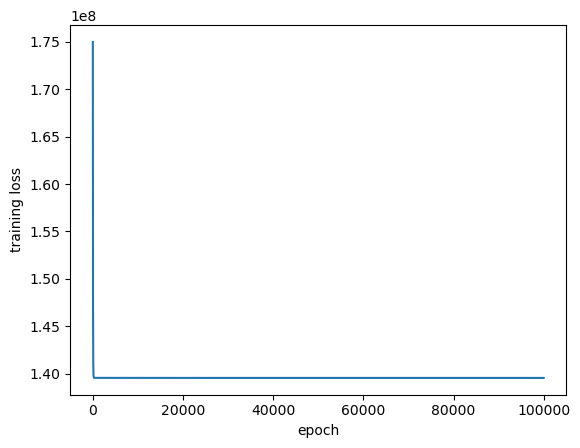

In [16]:
linear_reg_sf.plot_training_curve()

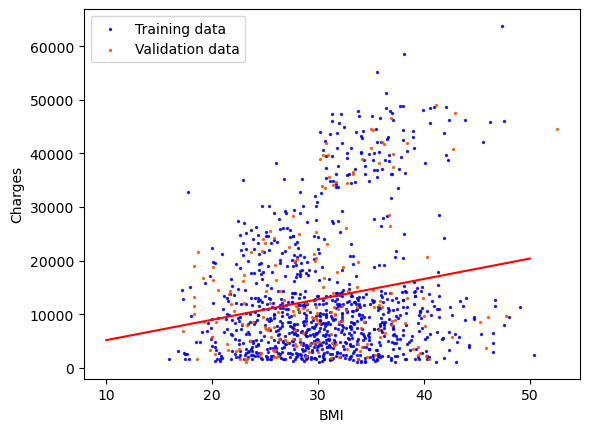

In [17]:
linear_reg_sf.plot_curve(x_train, y_train, x_val, y_val)

### 2. Multiple features

In [18]:
x_train = np.asarray(data_train[:, :6], dtype = "float64")
y_train = np.asarray(data_train[:, 6], dtype = "float64")

x_val = np.asarray(data_val[:, :6], dtype = "float64")
y_val = np.asarray(data_val[:, 6], dtype = "float64")

x_test = np.asarray(data_test[:, :6], dtype = "float64")

In [19]:
# convert x to design matrix
X_train = np.concatenate((x_train, np.asarray(np.ones((x_train.shape[0])).reshape((-1, 1)), dtype="float64")), axis = 1)
X_val = np.concatenate((x_val, np.asarray(np.ones((x_val.shape[0])).reshape((-1, 1)), dtype="float64")), axis = 1)
X_test = np.concatenate((x_test, np.asarray(np.ones((x_test.shape[0])).reshape((-1, 1)), dtype="float64")), axis = 1)

w = np.array([300,15000, 300, 500, 0, 600, -20000])
lr = 0.0003 # learning rate
e = 550000  # epoch

linear_reg_mf = LinearRegression()
linear_reg_mf.weights = w
linear_reg_mf.fit(X_train, y_train, lr = lr, epochs= e)

In [20]:
print("Intercepts: ", linear_reg_mf.weights[-1])
print("Weights: ", linear_reg_mf.weights[:-1])

Intercepts:  -11857.713109619592
Weights:  [  259.85393003  -383.5029728    333.34733263   442.56828916
 24032.24816382  -416.00179778]


In [21]:
print("Training loss: ", linear_reg_mf.evaluate(X_train, y_train))

Training loss:  34697170.26588205


In [22]:
print("Validation loss: ", linear_reg_mf.evaluate(X_val, y_val))

Validation loss:  41958613.25834867


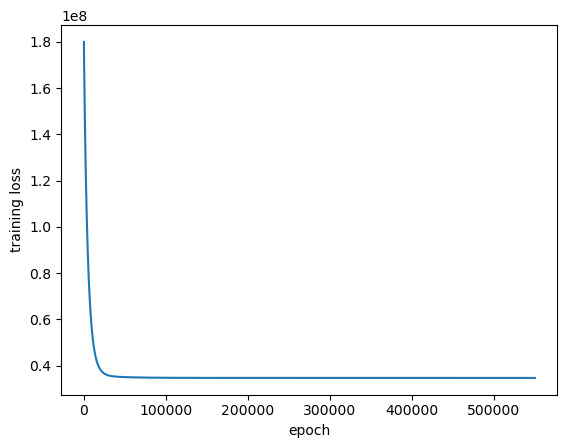

In [23]:
linear_reg_mf.plot_training_curve()

### 3. Train my model

##### pre-process data

In [24]:
# convert input data to design matrix
num_features = 10+1

my_X_train = np.asarray(np.ones((size_data_train[0], num_features)), dtype="float64")
my_X_val = np.asarray(np.ones((size_data_val[0], num_features)), dtype="float64")
my_X_test = np.asarray(np.ones((size_data_test[0], num_features)), dtype = "float64")
for i in range(size_data_train[0]):
    age = float(data_train[i][0])
    sex = float(data_train[i][1])
    bmi = float(data_train[i][2])
    children = float(data_train[i][3])
    smoke = float(data_train[i][4])
    region = float(data_train[i][5])
    my_X_train[i][0] = age
    my_X_train[i][1] = age**2
    my_X_train[i][2] = age**3
    my_X_train[i][3] = sex
    my_X_train[i][4] = bmi
    my_X_train[i][5] = children
    my_X_train[i][6] = children**2
    my_X_train[i][7] = smoke
    my_X_train[i][8] = smoke**2
    my_X_train[i][9] = smoke**3
    
for i in range(size_data_val[0]):
    age = float(data_val[i][0])
    sex = float(data_val[i][1])
    bmi = float(data_val[i][2])
    children = float(data_val[i][3])
    smoke = float(data_val[i][4])
    region = float(data_val[i][5])
    my_X_val[i][0] = age
    my_X_val[i][1] = age**2
    my_X_val[i][2] = age**3
    my_X_val[i][3] = sex
    my_X_val[i][4] = bmi
    my_X_val[i][5] = children
    my_X_val[i][6] = children**2
    my_X_val[i][7] = smoke
    my_X_val[i][8] = smoke**2
    my_X_val[i][9] = smoke**3
for i in range(size_data_test[0]):
    age = float(data_test[i][0])
    sex = float(data_test[i][1])
    bmi = float(data_test[i][2])
    children = float(data_test[i][3])
    smoke = float(data_test[i][4])
    region = float(data_test[i][5])
    my_X_test[i][0] = age
    my_X_test[i][1] = age**2
    my_X_test[i][2] = age**3
    my_X_test[i][3] = sex
    my_X_test[i][4] = bmi
    my_X_test[i][5] = children
    my_X_test[i][6] = children**2
    my_X_test[i][7] = smoke
    my_X_test[i][8] = smoke**2
    my_X_test[i][9] = smoke**3
my_y_train = np.asarray(data_train[:, 6], dtype="float64")
my_y_val = np.asarray(data_val[:, 6], dtype="float64")

weights:  [ 1.74008618e+02 -1.82671992e+00  7.02608340e-02 -1.76999768e+02
  3.20010540e+02  1.16100038e+03 -1.73999212e+02  5.72000702e+02
  1.14500070e+03  2.29100070e+03 -9.75799965e+03]
train loss:  104811498.06540337
validation loss:  119770247.78675006


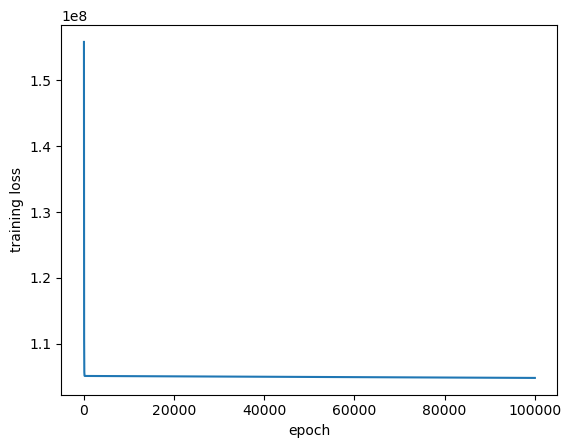

In [25]:
lr = 0.000000000001
e = 100000
w = np.array([174, -2, 0.01, -177, 320, 1161, -174, 572, 1145, 2291, -9758])
my_linear_reg = LinearRegression()
my_linear_reg.weights = w
my_linear_reg.fit(my_X_train, my_y_train, lr = lr, epochs = e)
print("weights: ", my_linear_reg.weights)
print("train loss: ", my_linear_reg.evaluate(my_X_train, my_y_train))
print("validation loss: ", my_linear_reg.evaluate(my_X_val, my_y_val))
my_linear_reg.plot_training_curve()

In [26]:
my_y_pred = my_linear_reg.predict(my_X_test)
with open("311554040_prediction.csv", "w", newline='') as outputFile:
    w = csv.writer(outputFile)
    w.writerow(["age", "sex", "bmi", "smoke", "children", "region", "charges"])
    for i in range(size_data_test[0]):
        l = np.concatenate((data_test[i, :6], np.array([my_y_pred[i]])))
        w.writerow(l)